In [1]:
!nvidia-smi

Fri Jun 27 08:07:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# !git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.54 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5


In [2]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_p

In [3]:
%cd /content
!curl -L "https://app.roboflow.com/ds/xuLr0Hbhr9?key=edER7UXY1P" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
A
A
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1076      0 --:--:-- --:--:-- --:--:--  1076
100 3569k  100 3569k    0     0  2098k      0  0:00:01  0:00:01 --:--:-- 5482k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/tomato104_jpg.rf.f8f442df4e1a30ac91f6244448e7f1de.jpg  
 extracting: test/images/tomato114_jpg.rf.e38a950d2831c684fe72fd9b65672d80.jpg  
 extracting: test/images/tomato115_jpg.rf.2e39fc0c4d1fe77f8213c900e19fc277.jpg  
 extracting: test/images/tomato118_jpg.rf.1dd92e69a89a28784ce5e7752997273d.jpg  
 extracting: test/images/tomato11_jpg.rf.713e57e1c47f2b7abdd90b7e95132e2d.jpg  
 extracting: test/images/tomato122_jpg.rf.359b85c4bd08b2f7d24a73dae3d34826.jpg  
 ext

In [4]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['tomato']

In [5]:
import yaml
with open("data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [6]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [7]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
      f.write(cell.format(**globals()))

In [8]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml
# parametersnc: {num_classes} # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
# anchors
anchors:
- [10,13, 16,30, 33,23] # P3/8
- [30,61, 62,45, 59,119] # P4/16
- [116,90, 156,198, 373,326] # P5/32
# YOLOv5 backbone
backbone:
# [from, number, module, args]
[[-1, 1, Focus, [64, 3]], # 0-P1/2
[-1, 1, Conv, [128, 3, 2]], # 1-P2/4
[-1, 3, BottleneckCSP, [128]],
[-1, 1, Conv, [256, 3, 2]], # 3-P3/8
[-1, 9, BottleneckCSP, [256]],
[-1, 1, Conv, [512, 3, 2]], # 5-P4/16
[-1, 9, BottleneckCSP, [512]],
[-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
[-1, 1, SPP, [1024, [5, 9, 13]]],
[-1, 3, BottleneckCSP, [1024, False]], # 9
]
# YOLOv5 head
head:
[[-1, 1, Conv, [512, 1, 1]],
[-1, 1, nn.Upsample, [None, 2, 'nearest']],
[[-1, 6], 1, Concat, [1]], # cat backbone P4
[-1, 3, BottleneckCSP, [512, False]], # 13
[-1, 1, Conv, [256, 1, 1]],
[-1, 1, nn.Upsample, [None, 2, 'nearest']],
[[-1, 4], 1, Concat, [1]], # cat backbone P3
[-1, 3, BottleneckCSP, [256, False]], # 17 (P3/8-small)
[-1, 1, Conv, [256, 3, 2]],
[[-1, 14], 1, Concat, [1]], # cat head P4
[-1, 3, BottleneckCSP, [512, False]], # 20 (P4/16-medium)
[-1, 1, Conv, [512, 3, 2]],
[[-1, 10], 1, Concat, [1]], # cat head P5
[-1, 3, BottleneckCSP, [1024, False]], # 23 (P5/32-large)
[[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
]

In [3]:
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 300 --data '../data.yaml' --cfg ./models/yolov5s.yaml --weights '../yolov5s.pt' --name yolov5s_results  --cache

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-27 08:16:59.531817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751012219.551602    3937 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751012219.557785    3937 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: vjivandro77 (vjivandro77-universitas-jember) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=../yolov5s.pt, cfg=./models/yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, ep

In [7]:
%cd /content/yolov5/
!python val.py --img 416 --batch 16 --weights /content/yolov5/runs/train/yolov5s_results5/weights/best.pt --data /content/data.yaml

/content/yolov5
val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/yolov5s_results5/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:01<00:00,  1.55it/s]
                   all         45        253      0.954      0.953      0.983      0.602
Speed: 0.2ms pre-process, 6.8ms inference, 6.8ms NMS per image at shape (16, 3, 416, 416)
R

In [8]:
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results5/weights/best.pt --img-size 380 --iou-thres 0.1 --conf 0.1 --source /content/tomato.jpg

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5s_results5/weights/best.pt'], source=/content/tomato.jpg, data=data/coco128.yaml, imgsz=[380, 380], conf_thres=0.1, iou_thres=0.1, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [380, 380] must be multiple of max stride 32, updating to [384, 384]
image 1/1 /content/tomato.jpg: 288x384 30 tomatos, 30.6ms
Speed: 0.5ms pre-process, 30.6ms inference, 213.3ms NMS per image at shape (1, 3, 384, 384)
Results saved to runs/detect

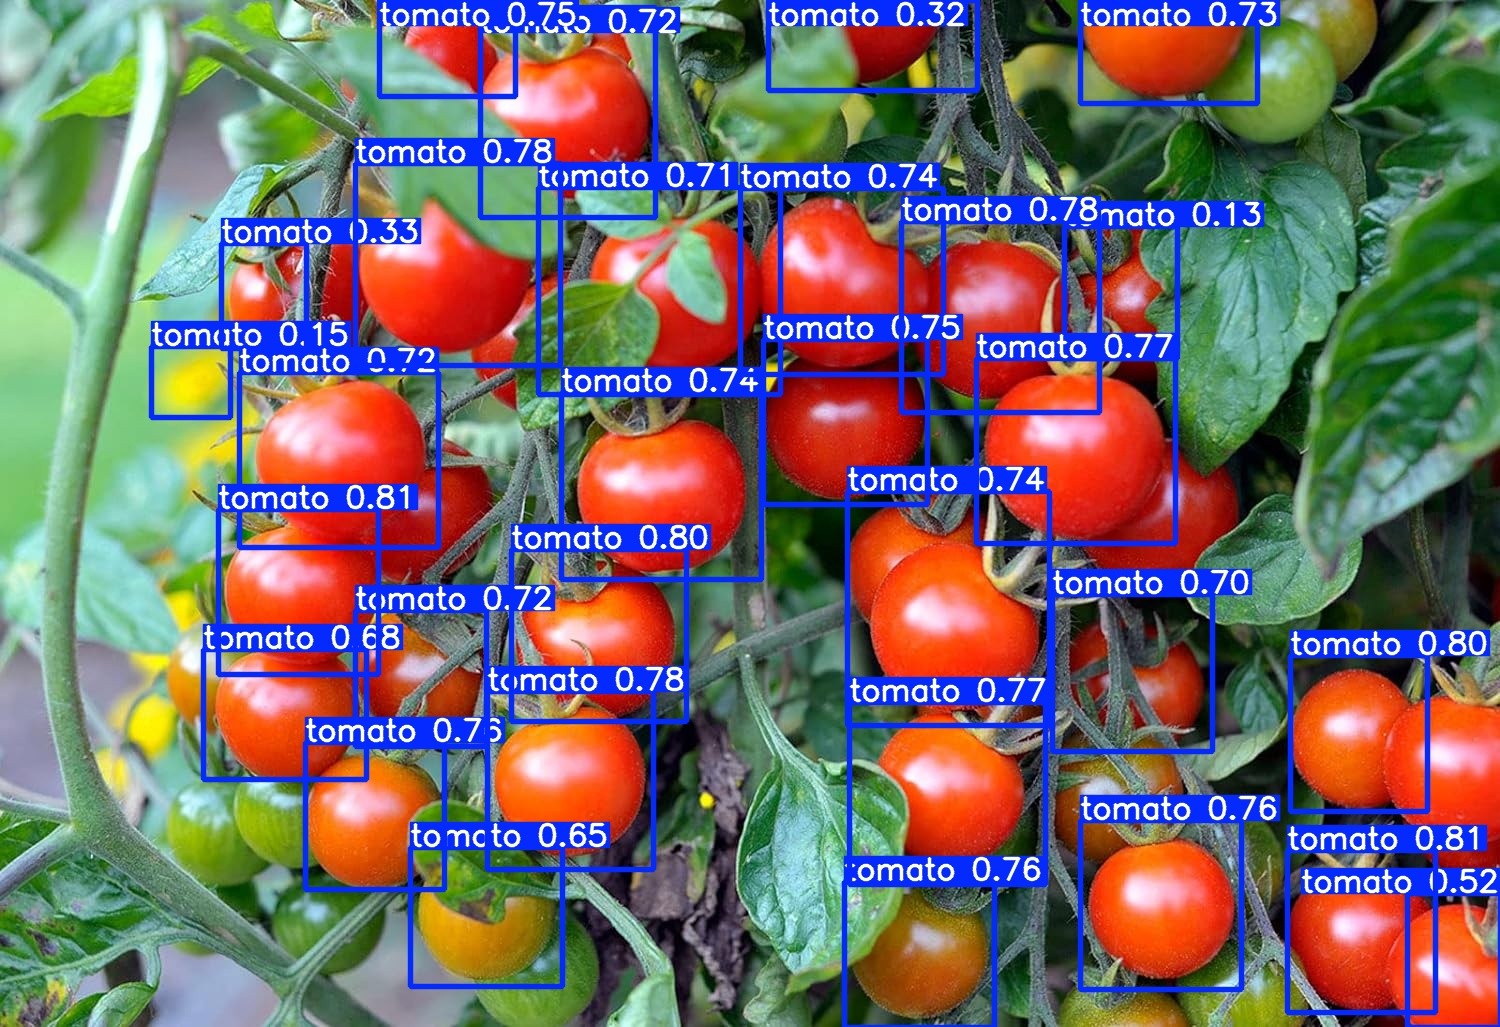

In [9]:
from keras.preprocessing import image
image.load_img('/content/yolov5/runs/detect/exp/tomato.jpg')